# Import Libraries

In [1002]:
import pandas as pd
import numpy as np

# Import matplotlib library and set dark mode
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Import seaborn
import seaborn as sns

# Change theme of notebook to dark mode
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')


# Loading Data

First lets load the datasets and take a look 

In [1003]:
df_train = pd.read_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\train_ctrUa4K.csv")
df_test = pd.read_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\test_lAUu6dG.csv")

In [1004]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are many features here that you would expect to influence loan status. For instance:
- Not self imployed - if you are self-employed your income isn't has secure so there's less chance you will be able to pay a loan
- High income - higher income people are more likely able to pay off loans
- Loan amount - a high loan amount is les likely to be approved



# Univariate Analysis - Initial Data Exploration 

Let's first plot the loan status to see the proportion of loans given

In [1005]:
df_train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Count of Loans Approved')

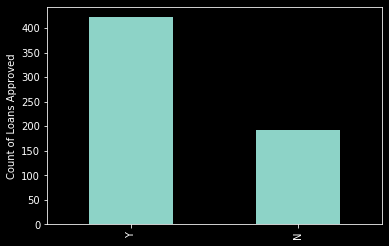

In [1006]:
df_train['Loan_Status'].value_counts().plot.bar()
plt.ylabel('Count of Loans Approved')

Next let's take a look at the features, starting with cateogrical

Text(0, 0.5, 'Count of Loans Approved')

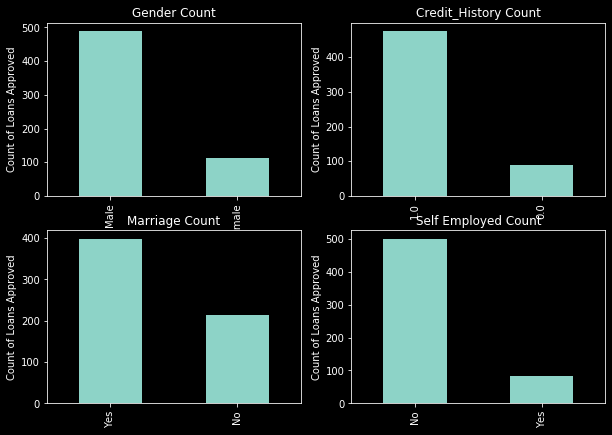

In [1007]:
fig = plt.figure(figsize=(10,7))

plt.subplot(2, 2, 1)
df_train['Gender'].value_counts().plot.bar()
plt.title('Gender Count')
plt.ylabel('Count of Loans Approved')

plt.subplot(2, 2, 2)
df_train['Credit_History'].value_counts().plot.bar()
plt.title('Credit_History Count')
plt.ylabel('Count of Loans Approved')

plt.subplot(2, 2, 3)
df_train['Married'].value_counts().plot.bar()
plt.title('Marriage Count')
plt.ylabel('Count of Loans Approved')

plt.subplot(2, 2, 4)
df_train['Self_Employed'].value_counts().plot.bar()
plt.title('Self Employed Count')
plt.ylabel('Count of Loans Approved')

	

You can see most loan applications are from:
- Males
- Non self-employed people
- Married people
- People with a credit history

Text(0, 0.5, 'Count of Loans Approved')

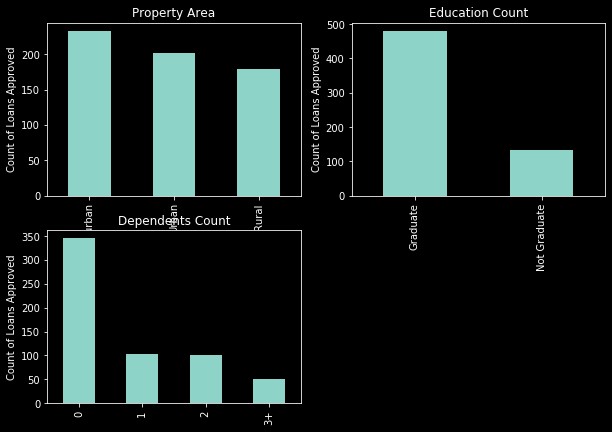

In [1008]:
# Create blank figure
fig = plt.figure(figsize=(10,7))

# Add one plot at a time
plt.subplot(2, 2, 1)
df_train['Property_Area'].value_counts().plot.bar()
plt.title('Property Area')
plt.ylabel('Count of Loans Approved')

plt.subplot(2, 2, 2)
df_train['Education'].value_counts().plot.bar()
plt.title('Education Count')
plt.ylabel('Count of Loans Approved')

plt.subplot(2, 2, 3)
df_train['Dependents'].value_counts().plot.bar()
plt.title('Dependents Count')
plt.ylabel('Count of Loans Approved')

Most loans applications are from:
- Graduates
- Ubran areas
- People with 0 dependents

Now let's have a look at the numerical data

Text(0.5, 1.0, 'Applicant Income')

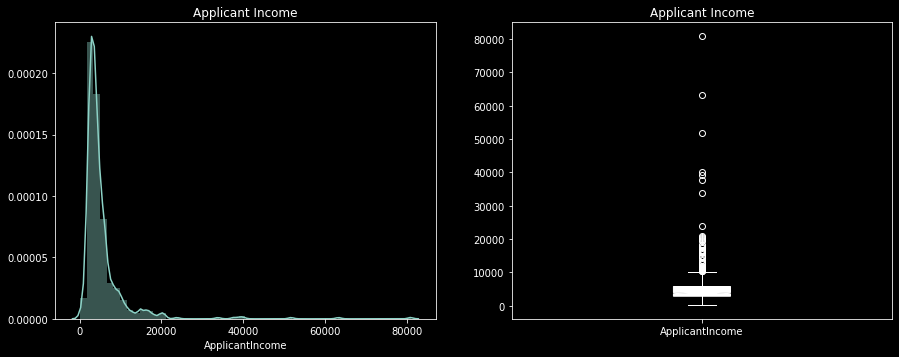

In [1009]:
fig = plt.figure(figsize=(15,12))

plt.subplot(2, 2, 1)
sns.distplot(df_train['ApplicantIncome'])
plt.title('Applicant Income')

c = "white"

# Colour changed to white as the default is very hard to read
plt.subplot(2, 2, 2)
df_train['ApplicantIncome'].plot.box( notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
plt.title('Applicant Income')

You can see that the applicant income is highly skewed towards the lower end with many outliers. 

Let's now look at coapplicant income

Text(0.5, 1.0, 'Coapplicant Income')

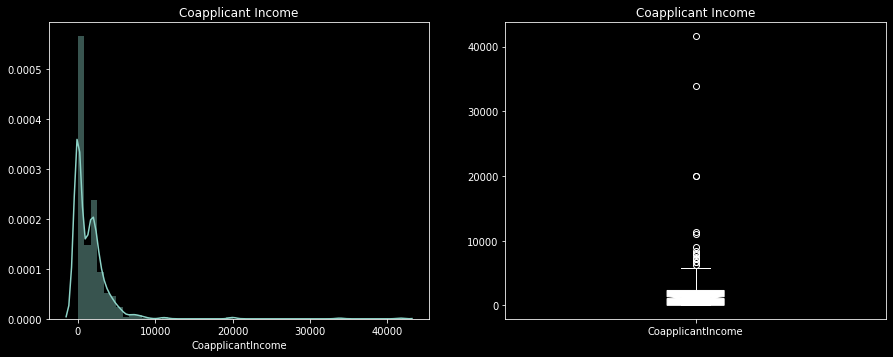

In [1010]:
fig = plt.figure(figsize=(15,12))

plt.subplot(2, 2, 1)
sns.distplot(df_train['CoapplicantIncome'])
plt.title('Coapplicant Income')

c = "white"

# Colour changed to white as the default is very hard to read
plt.subplot(2, 2, 2)
df_train['CoapplicantIncome'].plot.box( notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
plt.title('Coapplicant Income')

The skew of coapplicant income is very similar to the applicant income

Finally, let's take a look at the Loan Amount data

Text(0.5, 1.0, 'Loan Amount')

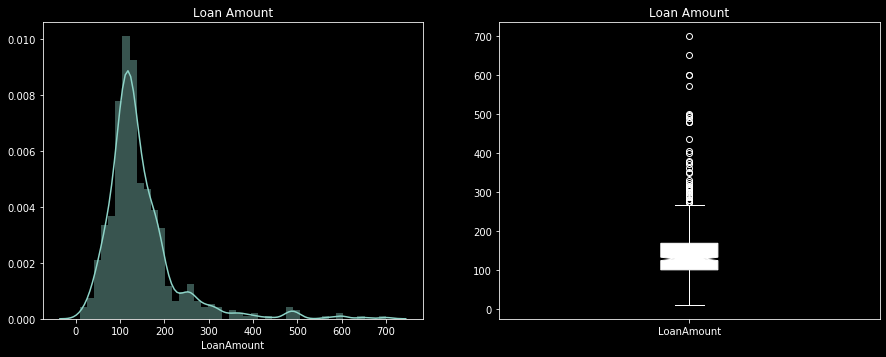

In [1011]:
fig = plt.figure(figsize=(15,12))

plt.subplot(2, 2, 1)
sns.distplot(df_train['LoanAmount'])
plt.title('Loan Amount')

c = "white"

# Colour changed to white as the default is very hard to read
plt.subplot(2, 2, 2)
df_train['LoanAmount'].plot.box( notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )
plt.title('Loan Amount')

The loan amount is more normally distributed than the other numerical features. There are still outliers.

In the next section the outliers will be removed and the data normalised as this will help the ML algorithm to perform better

# Bivariate Analysis

Let's take a look at the correlation between the all the numerical variables.

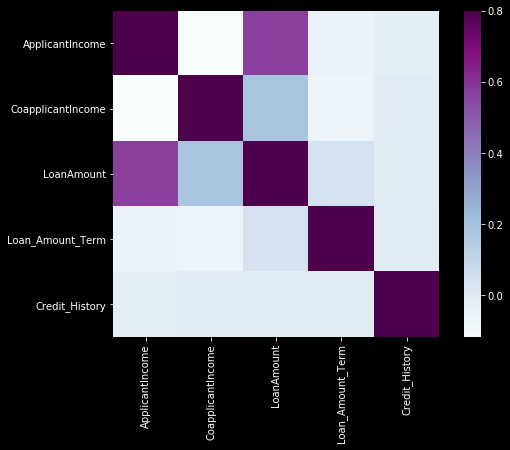

In [1012]:
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap = "BuPu")

The most correlated variables are applicate income and loan amount

# Missing Value and Outlier Treatment

Let's see which which features have missing values

In [1013]:
df_train.isnull().sum(axis = 0)
#df_train.info()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For the categorical variables we will replace nan with the mode

In [1014]:
# For train data:
for column in ['Gender']:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)
    
for column in ['Married']:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)
    
for column in ['Dependents']:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)
    
for column in ['Self_Employed']:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)
    
for column in ['Credit_History']:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)
    
# For test data:
for column in ['Gender']:
    df_test[column].fillna(df_test[column].mode()[0], inplace = True)
    
for column in ['Married']:
    df_test[column].fillna(df_test[column].mode()[0], inplace = True)
    
for column in ['Dependents']:
    df_test[column].fillna(df_test[column].mode()[0], inplace = True)
    
for column in ['Self_Employed']:
    df_test[column].fillna(df_test[column].mode()[0], inplace = True)
    
for column in ['Credit_History']:
    df_test[column].fillna(df_test[column].mode()[0], inplace = True)

Now let's look at the numerical values. Starting with Loan Amount Term

In [1015]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

360 is by far the most common value so let's replace nan with 360 (the mode)

In [1016]:
# For train data
for column in ['Loan_Amount_Term']:
    df_train[column].fillna(df_train[column].mode()[0], inplace = True)
    
# For test data
for column in ['Loan_Amount_Term']:
    df_test[column].fillna(df_test[column].mode()[0], inplace = True)

Finally let's look at loan amount. Recalling from earlier there are many outliers for loan amount so median is the most sensible replacement for nan (as mean will be heavily affected by outliers)

In [1017]:
# For train data
for column in ['LoanAmount']:
    df_train[column].fillna(df_train[column].median(), inplace = True)

# For test data
for column in ['LoanAmount']:
    df_test[column].fillna(df_test[column].median(), inplace = True)

The loan amount is positvely skewed with many high outliers. To remove the effect of these outliers, we will take the log transformation of the loan amount. This won't affect the the low values much but will reduced the high numbers significantly. 

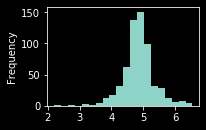

In [1018]:
# For train data
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
# For test data
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

# Drop non log loan amount
df_train.drop(['LoanAmount'], axis =1, inplace =True)
df_test.drop(['LoanAmount'], axis =1, inplace =True)

plt.subplot(2, 2, 2)
df_train['LoanAmount_log'].plot.hist(bins=20)

Double check that all the null values have been removed

In [1019]:
df_train.isnull().sum(axis = 0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [1020]:
df_test.isnull().sum(axis = 0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

# Initial Model Building

Let's first import the sklearn libraries from preprocessing the data and creating the model

In [1021]:
from sklearn import preprocessing
# Import the model
from sklearn.linear_model import LogisticRegression
# Import the function for splitting the data into test and train sets 
from sklearn.model_selection import train_test_split

In [1022]:
# Remove Loan ID as not helpful
df_train.drop(['Loan_ID'], axis = 1, inplace = True)
df_test.drop(['Loan_ID'], axis = 1, inplace = True)

In [1023]:
x_train = df_train.reset_index()
x_test = df_test.reset_index()
y_train = df_train.reset_index()
y_test = df_test.reset_index()

Separate independent and dependent variables

In [1024]:
x = df_train.drop(['Loan_Status'], axis = 1)
y = df_train.Loan_Status

Let's create dummy variables for all the categorical variables (so all the categorical variables are transformed into 1s and 0s)

In [1025]:
x = pd.get_dummies(x)
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

Let's split the training set into test and train so that we can test the model without using the competition test file

In [1026]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [1027]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (429, 20)
Training Labels Shape: (429,)
Testing Features Shape: (185, 20)
Testing Labels Shape: (185,)


Let's create the initial model

In [1028]:
# Create instance of the model 
logr = LogisticRegression()

# Train the model
logr.fit(x_train, y_train)

# Make predictions. P
predictions = logr.predict(x_test)

Let's evaluate the accuracy of the model

In [1029]:
accuracy = logr.score(x_test, y_test)
print(accuracy)

0.7891891891891892


Let's plot a confusion matrix on the test data to understand the classification performance - how many true positives etc.

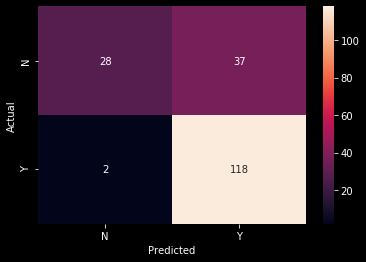

In [1030]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Create confusion matrix DF with predictions and expected (y_train)
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

# Plot matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')

The confusion matrix shows:
- Model very good at predicting true negatives
- Model only has poor precision  
Let's take a look at the precision and recall figures:

In [1031]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, predictions, pos_label='Y'))
print("Recall:",recall_score(y_test, predictions, pos_label='Y'))

Precision: 0.7612903225806451
Recall: 0.9833333333333333


We can see that the model's recall is very high, i.e. - the majority of the loans that were approved were identified
However, the model's precision is compartievly low, i.e. the model does correctly predict the majority of loans that were approved by it also produced lots of true negatives

# Logisitic Regression Using Stratified K-Folds Cross Validation

Let's use cross validation to evaluate hte models performance. 
First let's just run K Folds once

In [1032]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state = 1, shuffle = True)

# Evaluate model with cross-validation
score = cross_val_score(logr, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(score), std(score)))

Accuracy: 0.801 (0.050)


Running K-Fold once can result in a noisy evaluation. Instead let's run K-Fold cross validation multiple times and average the results

In [1033]:
from sklearn.model_selection import RepeatedKFold
# Prepare the the cross-validation procedure again using the skikit function RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate model with cross-validation
score = cross_val_score(logr, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(score), std(score)))


Accuracy: 0.803 (0.047)


Let's visualise the ROC (Reciever Operating Characteristic) curve to calculate the AUC Area Under the Curve. This is a measure of how many true positives vs false postives. 

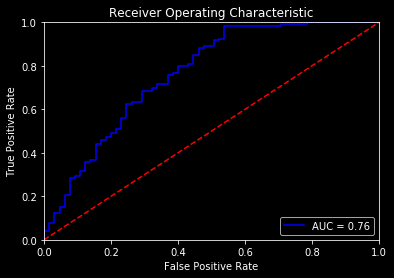

In [1034]:
from sklearn import metrics 

# calculate the fpr and tpr for all thresholds of the classification
probs = logr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='Y')
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature Engineering 

First let's add Loan Amount back into the DataFrames by applying the exponential to the column.

In [1035]:
# Add Loan Amount back into DataFrames 
df_train['LoanAmount'] = np.exp(df_train['LoanAmount_log'])
df_test['LoanAmount'] = np.exp(df_test['LoanAmount_log'])

Now let's create some new features which may be better for predicting the target variable.
First let's create total income. This is the applicant income + coapplicant income. This gives a better idea of whether the applicant can afford to pay the loan back.

Text(0.5, 1.0, 'TotalIncome')

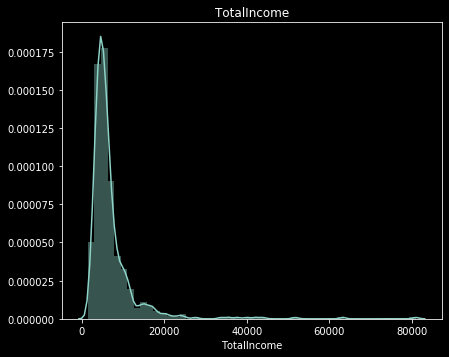

In [1036]:
# Combine applicant and coapplicant income
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

# Plot distribution of total income
fig = plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
sns.distplot(df_train['TotalIncome'])
plt.title('TotalIncome')

We can see the distribution has a positive skew. These outliers could lead to a less accurate model. Lets take a log to normalise the data

Text(0.5, 1.0, 'TotalIncome')

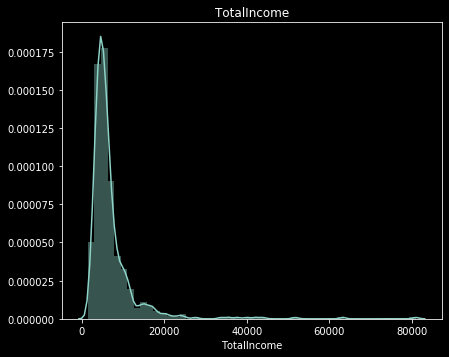

In [1037]:
# Take log of TotalIncome to normalise data
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])

# Plot normalised TotalIncome
fig = plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
sns.distplot(df_train['TotalIncome'])
plt.title('TotalIncome')

Next, let's create a feature for EMI (Equated Monthly Installment). EMI will tell us how much the applicant has to  pay back every month and hence will give a good indication of how likely they are to pay back the loan

Text(0.5, 1.0, 'EMI (Equated Monthly Installment in $1000s)')

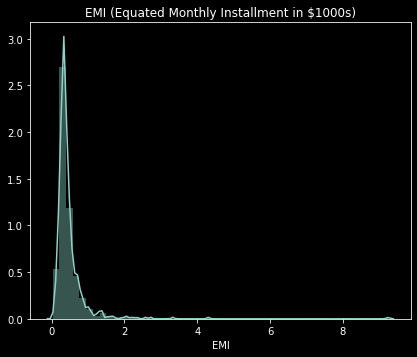

In [1038]:
# Calculate EMI (Loan amount divided by length of term)
df_train['EMI'] = df_train['LoanAmount'] / df_train['Loan_Amount_Term']
df_test['EMI'] = df_test['LoanAmount'] / df_test['Loan_Amount_Term']

# Plot normalised TotalIncome
fig = plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
sns.distplot(df_train['EMI'])
plt.title('EMI (Equated Monthly Installment in $1000s)')

Finally let's create balance income. This is the remaining income after EMI. If balance income is high then there is a high likelihood that the applicant can afford to pay back the loan. 

Text(0.5, 1.0, 'BalanceIncome')

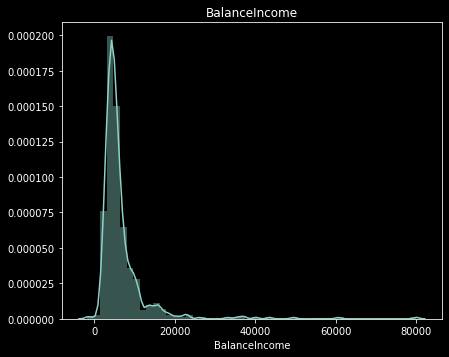

In [1039]:
# Calculate the BalacedIncome. Multiplied by 1000 to make the units equal
df_train['BalanceIncome'] = df_train['TotalIncome'] - (df_train['EMI']*1000)
df_test['BalanceIncome'] = df_test['TotalIncome'] - (df_test['EMI']*1000)

# Plot normalised BalancedIncome
fig = plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
sns.distplot(df_train['BalanceIncome'])
plt.title('BalanceIncome')

Let's now drop the variables that were used to build the features. Logisitc regression assumes non correlation (help remove noise).

In [1040]:
df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'TotalIncome'], axis = 1, inplace = True)
df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount', 'TotalIncome'], axis = 1, inplace = True)

In [1041]:
df_train.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,TotalIncome_log,EMI,BalanceIncome
0,1.0,4.852030,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,8.674026,0.355556,5493.444444
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,8.714568,0.355556,5735.444444
2,1.0,4.189655,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,8.006368,0.183333,2816.666667
3,1.0,4.787492,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,1,8.505323,0.333333,4607.666667
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,8.699515,0.391667,5608.333333


# Final Model Building 

Build again with logistic regression
Decision Tree
Random Forest - plot most important features
XGBooset
Plot scores on bar chart

Let's run the model again now that we have created new features

In [1042]:
# Separate data into features and target
x2 = df_train.drop(['Loan_Status_N', 'Loan_Status_Y'], axis = 1)
# y is defined above

In [1043]:
# Split train data up
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.3, random_state = 42)

In [1044]:
# Create instance of the model 
logr = LogisticRegression()

# Train the model
logr.fit(x_train, y_train)

# Make predictions
predictions = logr.predict(x_test)

In [1045]:
accuracy = logr.score(x_test, y_test)
print(accuracy)

0.7837837837837838


Unfortunately feature engineering hasn't improved the accuracy of the model. 
Next let's build a decision tree model

In [1046]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7297297297297297


Next let's build a random forest classifier 

In [1047]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initiate model
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets 
clf.fit(x_train,y_train)

# Caculate predicted labels using the random forest model
y_pred2=clf.predict(x_test)

# Model Accuracy, how often is the classifier correct? This number represents how well the model predicted people would survive compared to the reality
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7945945945945946


Let's take a look at the most important features. 

No handles with labels found to put in legend.


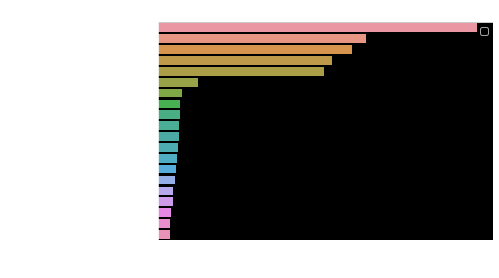

In [1048]:
# Create feature importance array based on the model results and which features were inputted into it
feature_imp = pd.Series(clf.feature_importances_,index=x2.columns.values).sort_values(ascending=False)

import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

After credit history, we can see that the most important features are the ones that we created in feature engineering

# Submit Predictions

The best model made so far is the original logistic regression model. Let's submit this to competition.

In [1049]:
# Make preduction using the test data provided by the competition 
submission_predictions = logr.predict(df_test)

In [1050]:
# Create DataFrame from the provided sample submission upload (we will use the Loan_ID column)
submission = pd.read_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\sample_submission_49d68Cx.csv")

# Add model predictions to the submission file
submission['Loan_Status'] = submission_predictions

# Export submission file as csbv
submission.to_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\Loan Status Predictions.csv",index=False)